In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
toyota = pd.read_csv("ToyotaCorolla.csv",encoding='unicode_escape')
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
toyota.shape

(1436, 38)

In [4]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

# Feature Selection

In [5]:
toyota = toyota.loc[:,["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
toyota.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# Finding the Null value

In [6]:
toyota.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

# There are no null value in this dataset

In [7]:
toyota[toyota.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


# Remove the duplicate value

In [8]:
toyota.drop_duplicates(inplace=True)

In [9]:
toyota.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# Finding the correlation

In [10]:
toyota.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


In [11]:
import seaborn as sns

# Pairplots Visualization

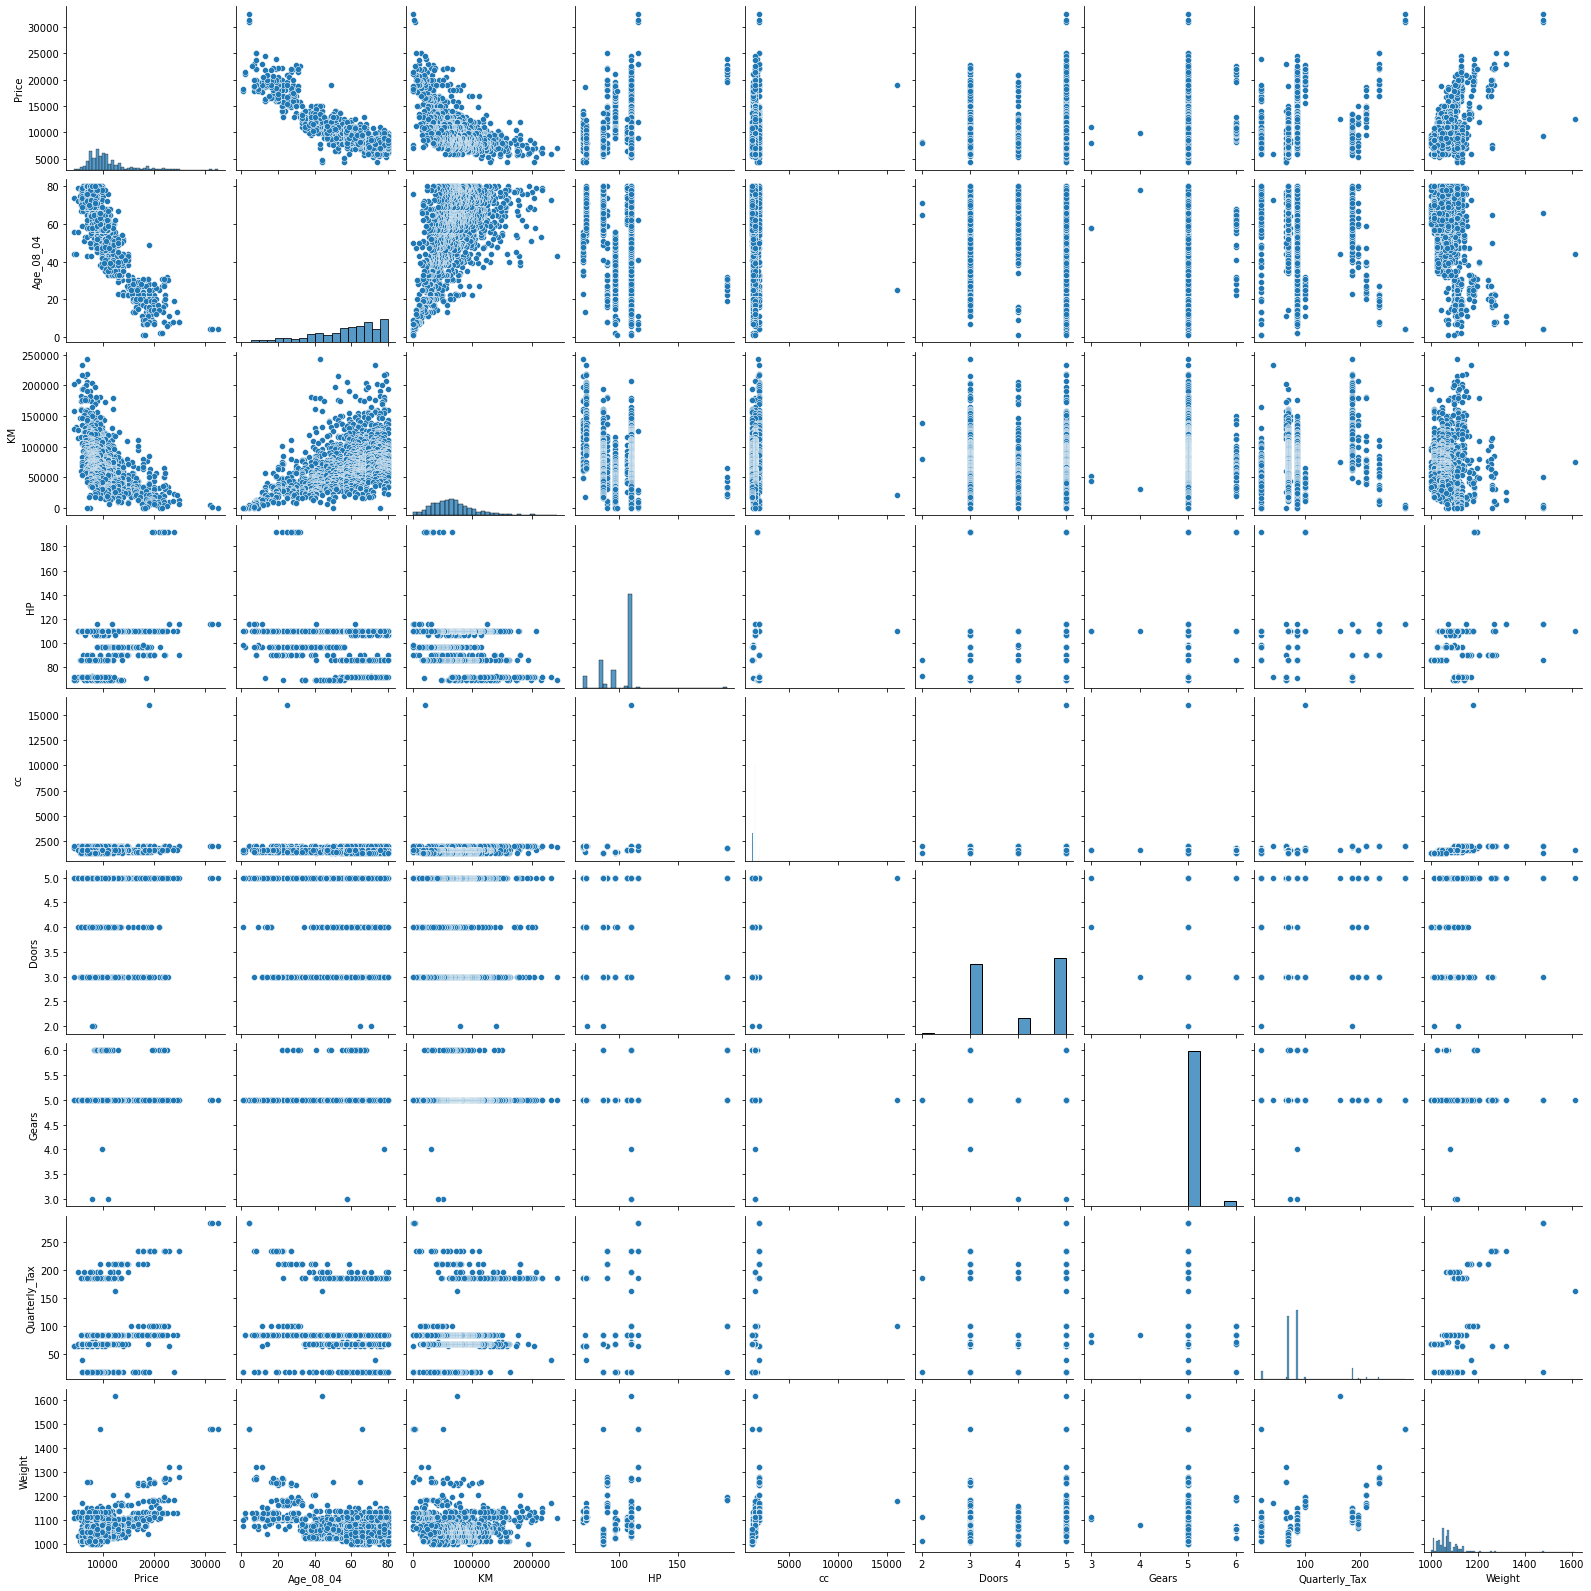

In [12]:
sns.pairplot(toyota)

# Outlier Detection

<AxesSubplot:>

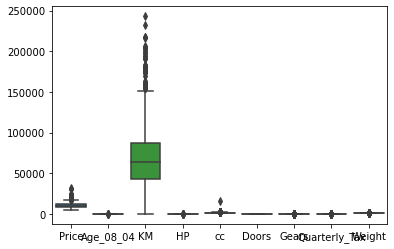

In [13]:
sns.boxplot(data=toyota)

In [14]:
toyota.Gears.value_counts()

5    1389
6      43
3       2
4       1
Name: Gears, dtype: int64

In [15]:
toyota=toyota.copy()

In [16]:
toyota=toyota[(toyota.Gears	!=3) & (toyota.Gears!=4)]

In [17]:
toyota.Doors.value_counts()

5    672
3    621
4    137
2      2
Name: Doors, dtype: int64

In [18]:
toyota=toyota[toyota.Doors!=2]
toyota

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


<AxesSubplot:>

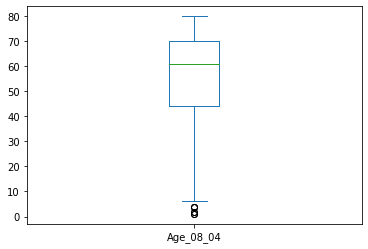

In [19]:
toyota.Age_08_04.plot(kind='box')

C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age_08_04', ylabel='Density'>

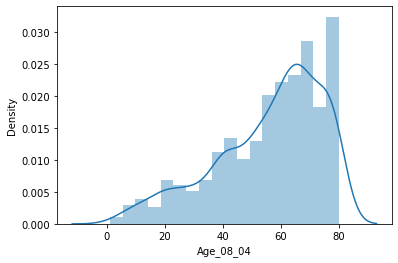

In [20]:
sns.distplot(toyota.Age_08_04)

<AxesSubplot:>

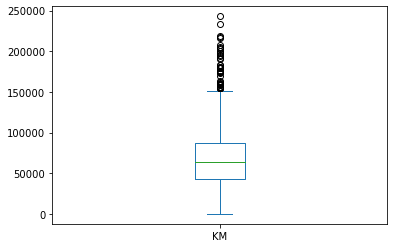

In [21]:
toyota.KM.plot(kind='box')

<AxesSubplot:>

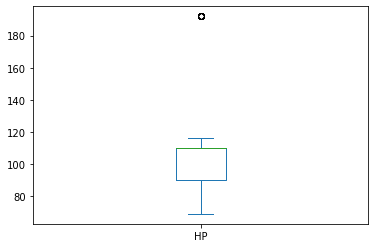

In [22]:
toyota.HP.plot(kind='box')

In [23]:
toyota[toyota.HP>180]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
8,21500,27,19700,192,1800,3,5,100,1185
10,20950,25,31461,192,1800,3,6,100,1185
11,19950,22,43610,192,1800,3,6,100,1185
12,19600,25,32189,192,1800,3,6,100,1185
13,21500,31,23000,192,1800,3,6,100,1185
14,22500,32,34131,192,1800,3,6,100,1185
15,22000,28,18739,192,1800,3,6,100,1185
16,22750,30,34000,192,1800,3,5,100,1185
49,21950,31,64982,192,1800,5,6,100,1195
53,21950,27,49866,192,1800,5,5,100,1195


In [24]:
toyota[toyota.HP>180].index

Int64Index([8, 10, 11, 12, 13, 14, 15, 16, 49, 53, 141], dtype='int64')

In [25]:
toyota.loc[[8,10,11,12,13,14,15,16,49,53,141],'HP']=toyota[toyota.HP<180].HP.max()

<AxesSubplot:>

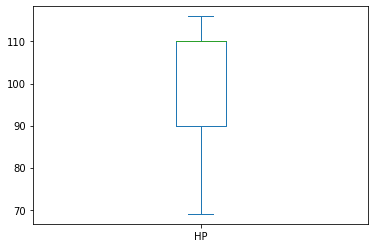

In [26]:
toyota.HP.plot(kind='box')

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


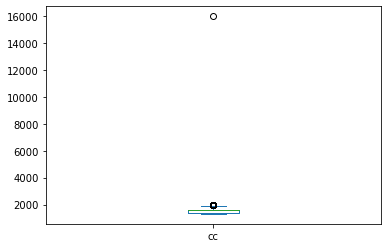

In [27]:
toyota.cc.plot(kind='box')
toyota[toyota.cc>14000]

# Removing the outliers 

In [28]:
m = toyota[toyota.cc<14000].cc.max()
m

2000

<AxesSubplot:>

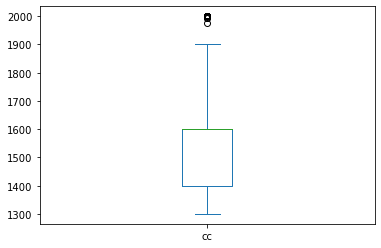

In [29]:
toyota.loc[80,'cc']=2000
toyota.cc.plot(kind='box')

<AxesSubplot:>

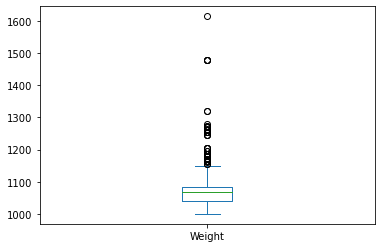

In [30]:
toyota.Weight.plot(kind='box')

In [31]:
toyota[toyota.Weight>1400].index

Int64Index([109, 110, 111, 221, 960], dtype='int64')

<AxesSubplot:>

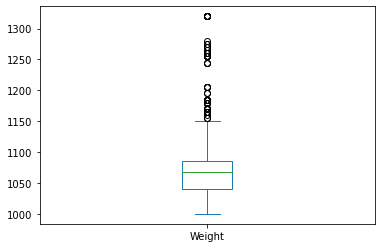

In [32]:
toyota.loc[[109,110,111,221,960],'Weight']=1320
toyota.Weight.plot(kind='box')

<AxesSubplot:>

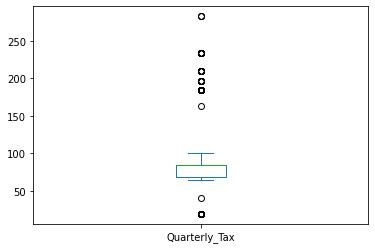

In [33]:
toyota.Quarterly_Tax.plot(kind='box')

In [34]:
toyota.loc[[109,110,111,112],'Quarterly_Tax']=toyota[toyota.Quarterly_Tax<250].Quarterly_Tax.max()
toyota.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# Checking with Dummies columns

In [35]:
toyota1 = pd.get_dummies(toyota,columns=['Doors','Gears'])
toyota1

,Price,Age_08_04,KM,HP,cc,Quarterly_Tax,Weight,Doors_3,Doors_4,Doors_5,Gears_5,Gears_6
0,13500,23,46986,90,2000,210,1165,1,0,0,1,0
1,13750,23,72937,90,2000,210,1165,1,0,0,1,0
2,13950,24,41711,90,2000,210,1165,1,0,0,1,0
3,14950,26,48000,90,2000,210,1165,1,0,0,1,0
4,13750,30,38500,90,2000,210,1170,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,69,1025,1,0,0,1,0
1432,10845,72,19000,86,1300,69,1015,1,0,0,1,0
1433,8500,71,17016,86,1300,69,1015,1,0,0,1,0
1434,7250,70,16916,86,1300,69,1015,1,0,0,1,0


# Preparing a Model

In [36]:
#build a model
import statsmodels.formula.api as smf
import warnings 
warnings.filterwarnings("ignore")

In [37]:
model=smf.ols('Price~Age_08_04+KM+cc+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=toyota1).fit()
model.rsquared

0.8578220166768152

In [38]:
np.sqrt(model.mse_resid)

1366.125644290829

In [39]:
model.pvalues

Intercept         3.281446e-12
Age_08_04        6.371115e-245
KM                4.689815e-61
cc                1.186319e-11
Doors_4           7.716039e-05
Doors_5           2.325134e-01
Gears_5           1.383348e-16
Gears_6           6.412583e-08
Quarterly_Tax     2.472886e-01
Weight            2.302582e-82
dtype: float64

In [40]:
#Coefficients
model.params

Intercept       -6505.080568
Age_08_04        -114.133047
KM                 -0.022218
cc                 -2.254534
Doors_4           524.512194
Doors_5           -99.986923
Gears_5         -3823.419351
Gears_6         -2681.661217
Quarterly_Tax      -1.543024
Weight             30.415341
dtype: float64

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     1072.
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:54:49   Log-Likelihood:                -12349.
No. Observations:                1430   AIC:                         2.472e+04
Df Residuals:                    1421   BIC:                         2.476e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6505.0806    925.827     -7.026      0.000   -8321.215   -4688.946
Age_08_04      -114.1330      2.769    -41.216      0.000    -119.565    -108.701
KM               -0.0222      0.001    -17.309      0.000      -0.025      -0.020
cc               -2.2545      0.330     -6.838      0.000      -2.901      -1.608
Doors_4         524.5122    132.297      3.965      0.000     264.993     784.031
Doors_5         -99.9869     83.712     -1.194      0.233    -264.199      64.225
Gears_5       -3823.4194    456.907     -8.368      0.000   -4719.705   -2927.134
Gears_6       -2681.6612    493.334     -5.436      0.000   -3649.403   -1713.920
Quarterly_Tax    -1.5430      1.333     -1.157      0.247      -4.158       1.072
Weight           30.4153      1.480     20.549      0.000      27.512      33.319
==============================================================================
Omnibus:                      222.989   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2858.283
Skew:                          -0.257   Prob(JB):                         0.00
Kurtosis:                       9.907   Cond. No.                     7.29e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.64e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [42]:
#t and p-Valuesvalue
print(model.tvalues, '\n', model.pvalues)

Intercept        -7.026237
Age_08_04       -41.215781
KM              -17.308966
cc               -6.838336
Doors_4           3.964646
Doors_5          -1.194419
Gears_5          -8.368042
Gears_6          -5.435791
Quarterly_Tax    -1.157436
Weight           20.549132
dtype: float64 
 Intercept         3.281446e-12
Age_08_04        6.371115e-245
KM                4.689815e-61
cc                1.186319e-11
Doors_4           7.716039e-05
Doors_5           2.325134e-01
Gears_5           1.383348e-16
Gears_6           6.412583e-08
Quarterly_Tax     2.472886e-01
Weight            2.302582e-82
dtype: float64


In [43]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8578220166768152, 0.8570215776433279)

# Test for Normality of Residuals

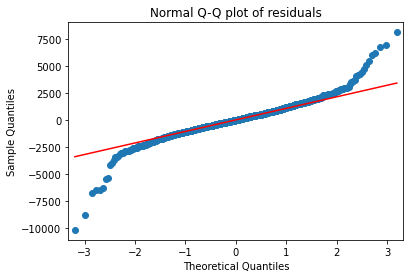

In [44]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

<AxesSubplot:>

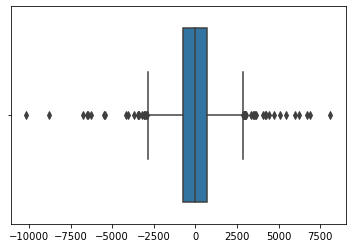

In [45]:
sns.boxplot(model.resid)

<AxesSubplot:ylabel='Density'>

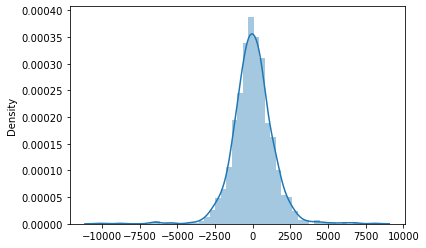

In [46]:
sns.distplot(model.resid)

# Residual Plot for Homoscedasticity

In [47]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

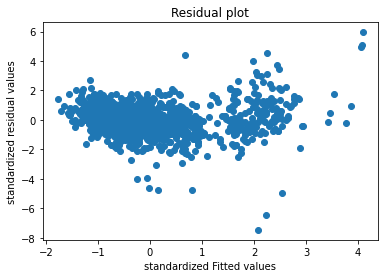

In [48]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))

plt.title('Residual plot')
plt.xlabel('standardized Fitted values')
plt.ylabel('standardized residual values')
plt.show()

In [49]:
model.fittedvalues

0       16603.256438
1       16026.667311
2       16606.325334
3       16238.327861
4       16144.946969
            ...     
1431     9478.227239
1432     8865.979858
1433     9024.194167
1434     9140.549052
1435    11143.497460
Length: 1430, dtype: float64

# Calculating VIF

In [50]:
import pandas as pd 
import numpy as np

In [51]:
rsq_age = smf.ols('Age_08_04~KM+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=toyota1).fit().rsquared
vif_age = 1/(1-rsq_age)

rsq_km = smf.ols('KM~Age_08_04+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=toyota1).fit().rsquared
vif_km = 1/(1-rsq_km)

rsq_hp = smf.ols('HP~Age_08_04+KM+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=toyota1).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_cc = smf.ols('cc~Age_08_04+KM+HP+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=toyota1).fit().rsquared
vif_cc = 1/(1-rsq_age)

rsq_qt = smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=toyota1).fit().rsquared
vif_qt = 1/(1-rsq_age)

rsq_wt = smf.ols('Weight~Age_08_04+KM+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=toyota1).fit().rsquared
vif_wt = 1/(1-rsq_age)


#storing vif values in a data frame
d1 = {'Variables':['age','km','hp','cc','qt','wt'],'VIF':[vif_age,vif_km,vif_cc,vif_qt,vif_wt]}
vif_frame = pd.DataFrame(toyota)
vif_frame

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


# Cook’s Distance

In [52]:
toyota.shape

(1430, 9)

In [53]:
toyota1.shape

(1430, 12)

# Removing data points with high cook's distance

In [54]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
k=8
n=1430
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff
toyota1['c']=c
toyota1=toyota1[toyota1.c<leverage_cutoff]

# Improving the Model

In [55]:
model2=smf.ols('Price~Age_08_04+KM+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=toyota1).fit()
model2.rsquared

0.8850691042398461

In [56]:
np.sqrt(model2.mse_resid)

1170.6556794006146

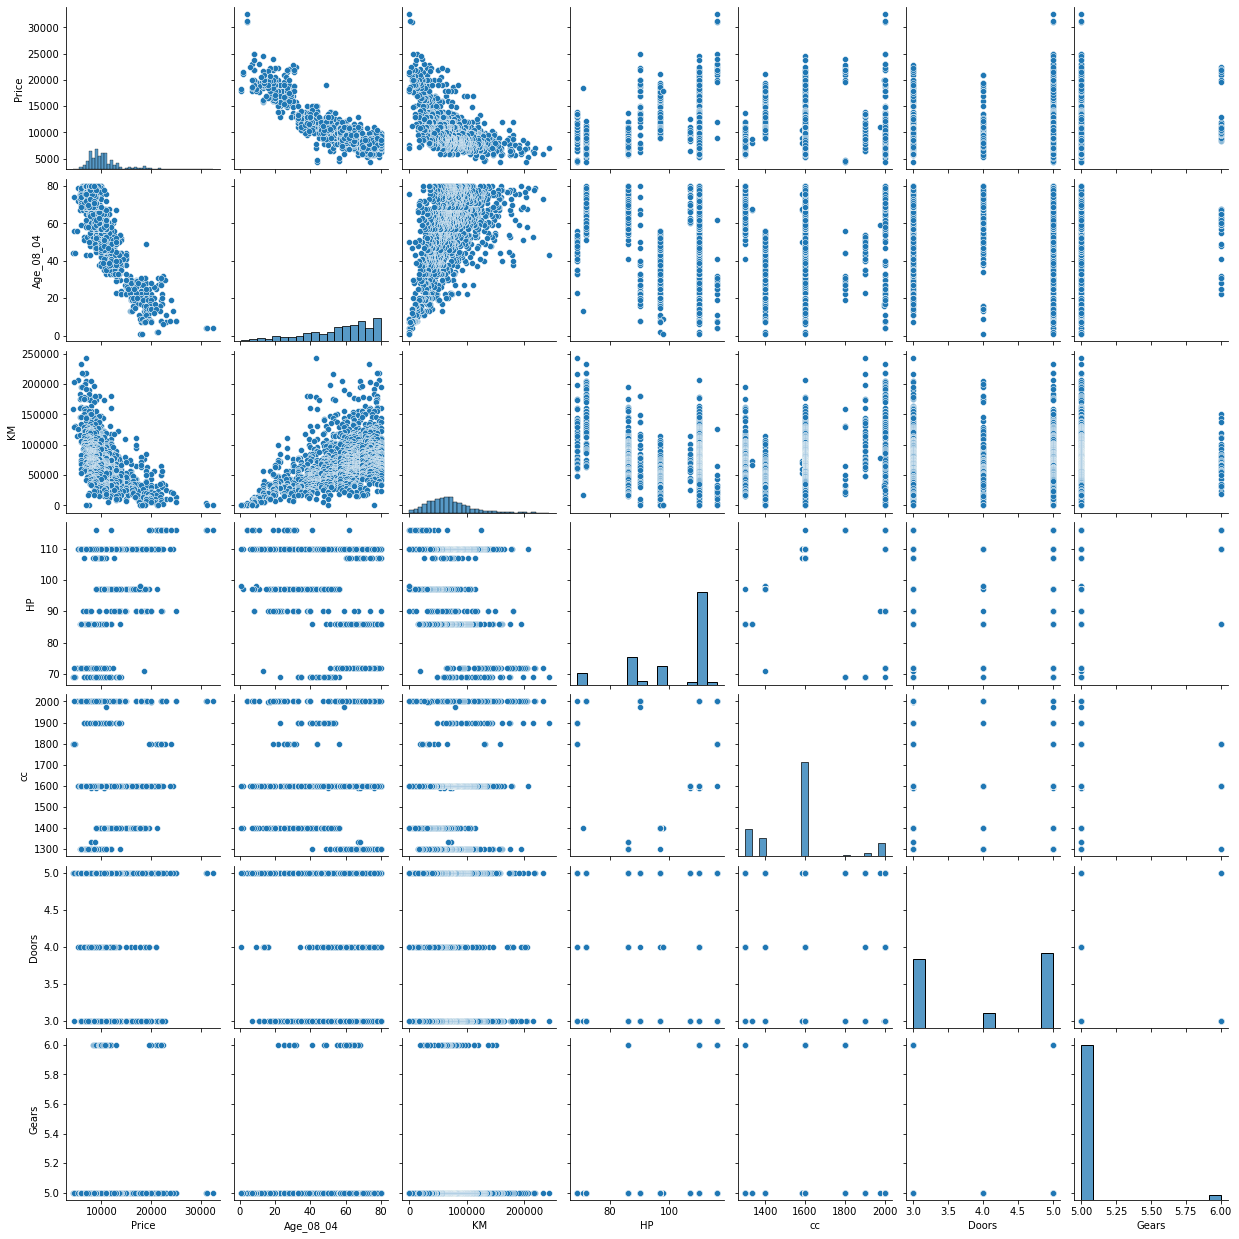

In [57]:
sns.pairplot(toyota.iloc[:,:7])

# Trying different Transormations for the Age Column

In [58]:
toyota1['age_sq']=toyota1.Age_08_04**2
toyota1['age_sqrt']=toyota1.Age_08_04**0.5
toyota1['age_log']=np.log(toyota1.Age_08_04)

,Price,Age_08_04,age_sq,age_sqrt,age_log
Price,1.000000,-0.888704,-0.830101,-0.902641,-0.874769
Age_08_04,-0.888704,1.000000,0.978500,0.988804,0.932985
age_sq,-0.830101,0.978500,1.000000,0.938799,0.851147
age_sqrt,-0.902641,0.988804,0.938799,1.000000,0.974695
age_log,-0.874769,0.932985,0.851147,0.974695,1.000000


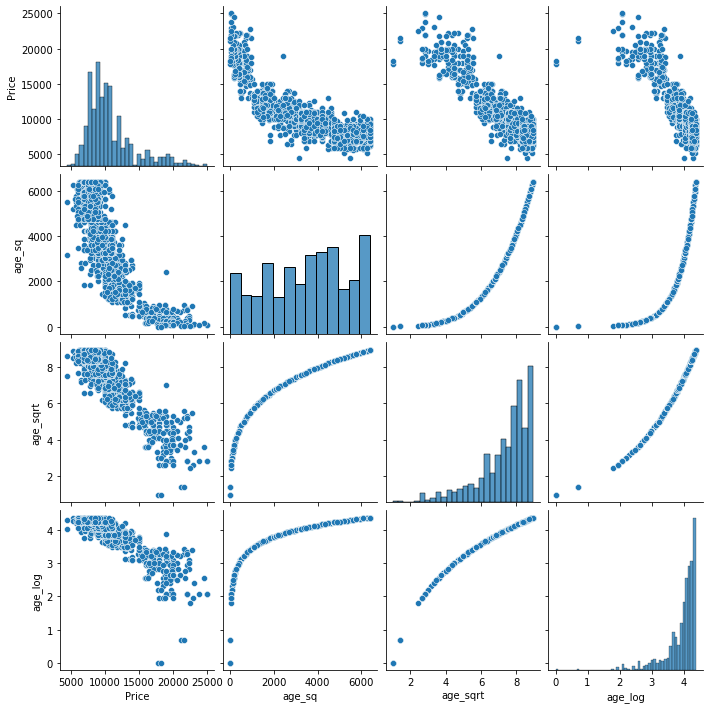

In [59]:
sns.pairplot(toyota1.loc[:,['Price','age_sq','age_sqrt','age_log']])
toyota1.loc[:,['Price','Age_08_04','age_sq','age_sqrt','age_log']].corr()

# sqrt has a good Linearity and Correlation creating a model with that transformation

In [60]:
model3=smf.ols('Price~age_sqrt+KM+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=toyota1).fit()
model3.rsquared

0.8900984244218235

In [61]:
np.sqrt(model3.mse_resid)

1144.7555031243335

In [62]:
model3.pvalues

Intercept         5.106210e-07
age_sqrt         1.852135e-285
KM                2.950595e-49
HP                1.236850e-14
cc                3.392393e-19
Doors_3           2.491968e-07
Doors_4           6.423867e-05
Doors_5           3.890181e-08
Gears_5           1.055259e-09
Gears_6           1.556357e-04
Quarterly_Tax     7.066179e-01
Weight            1.522453e-81
dtype: float64

# This Model has higher rsquares value and less eror

# Trying transformations for km column

,Price,KM,km_sq,km_sqrt,km_log
Price,1.000000,-0.572231,-0.441130,-0.634937,-0.521609
KM,-0.572231,1.000000,0.944839,0.972261,0.669135
km_sq,-0.441130,0.944839,1.000000,0.852744,0.515427
km_sqrt,-0.634937,0.972261,0.852744,1.000000,0.789411
km_log,-0.521609,0.669135,0.515427,0.789411,1.000000


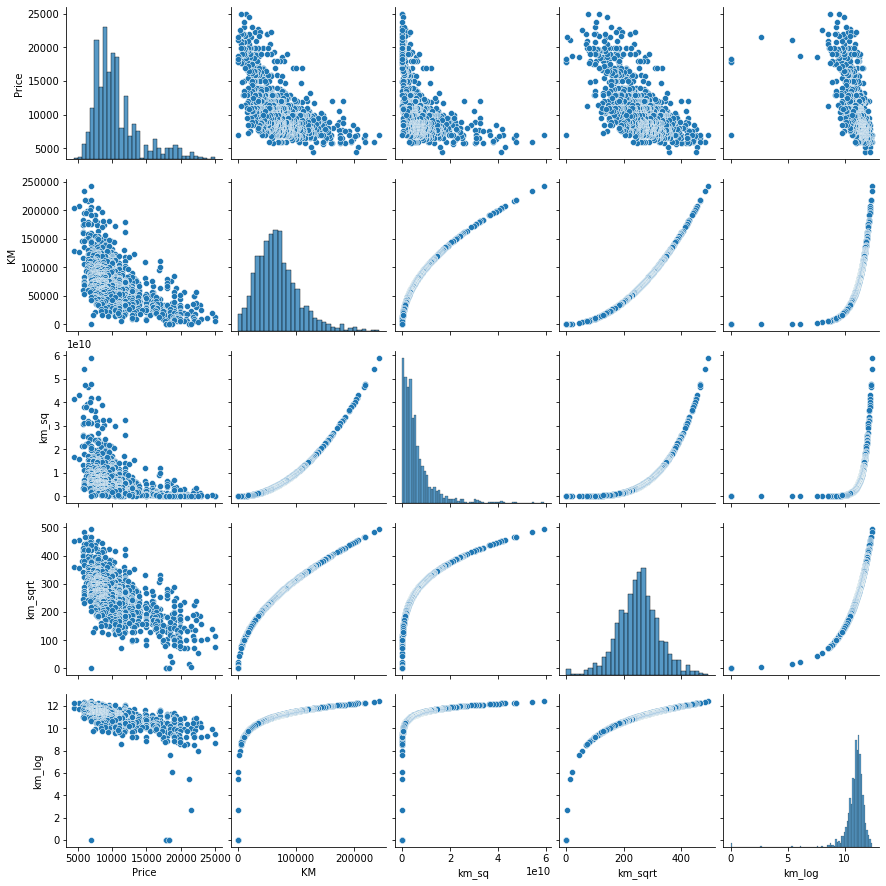

In [63]:
toyota1['km_sq']=toyota1.KM**2
toyota1['km_sqrt']=toyota1.KM**0.5
toyota1['km_log']=np.log(toyota1.KM)
sns.pairplot(toyota1.loc[:,['Price','KM','km_sq','km_sqrt','km_log']])
toyota1.loc[:,['Price','KM','km_sq','km_sqrt','km_log']].corr()

,Price,KM,km_sqrt,km_sqrt4,km_sqrt3,km_sqrt2
Price,1.000000,-0.572231,-0.634937,-0.642785,-0.644968,-0.635015
KM,-0.572231,1.000000,0.972261,0.954914,0.927755,0.882238
km_sqrt,-0.634937,0.972261,1.000000,0.997595,0.987611,0.961911
km_sqrt4,-0.642785,0.954914,0.997595,1.000000,0.996055,0.978103
km_sqrt3,-0.644968,0.927755,0.987611,0.996055,1.000000,0.992610
km_sqrt2,-0.635015,0.882238,0.961911,0.978103,0.992610,1.000000


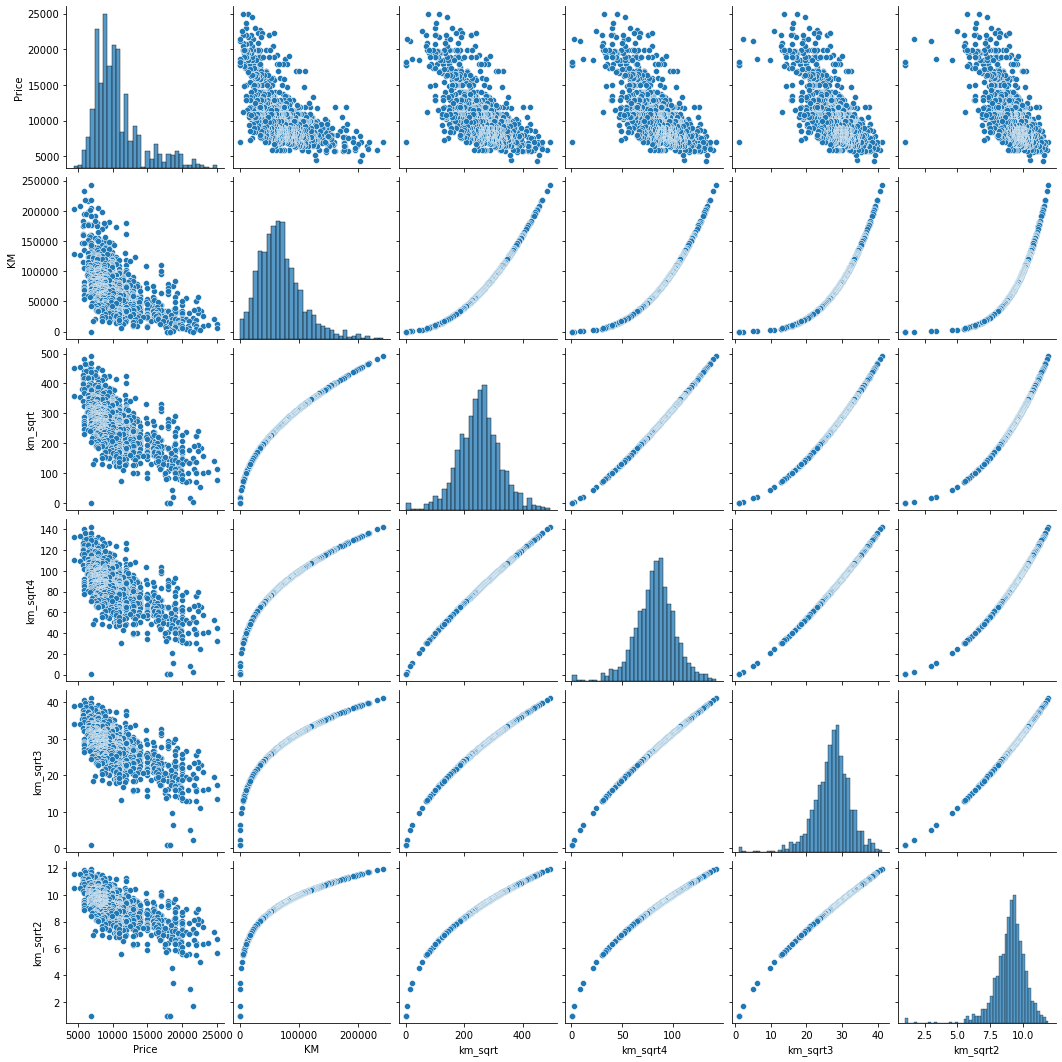

In [64]:
toyota1['km_sqrt4']=toyota.KM**0.4
toyota1['km_sqrt3']=toyota.KM**0.3
toyota1['km_sqrt2']=toyota.KM**0.2

sns.pairplot(toyota1.loc[:,['Price','KM','km_sqrt','km_sqrt4','km_sqrt3','km_sqrt2']])
toyota1.loc[:,['Price','KM','km_sqrt','km_sqrt4','km_sqrt3','km_sqrt2']].corr()

In [65]:
model4=smf.ols('Price~age_sqrt+km_sqrt+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=toyota1).fit()
model4_sqrt4=smf.ols('Price~age_sqrt+km_sqrt4+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=toyota1).fit()
model4_sqrt3=smf.ols('Price~age_sqrt+km_sqrt3+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=toyota1).fit()
model4_sqrt2=smf.ols('Price~age_sqrt+km_sqrt2+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=toyota1).fit()

print(model4.rsquared,model4_sqrt4.rsquared,model4_sqrt3.rsquared,model4_sqrt2.rsquared,sep='\n')
print(np.sqrt(model4.mse_resid),np.sqrt(model4_sqrt4.mse_resid),np.sqrt(model4_sqrt3.mse_resid),np.sqrt(model4_sqrt2.mse_resid))
model4.rsquared

0.8867177036101024
0.8849446119975836
0.8823883332822025
0.8788658479954146
1162.2292541498575 1171.2895303133746 1184.2297930404895 1201.8328827308787


0.8867177036101024

In [66]:
print(np.sqrt(model4.mse_resid),np.sqrt(model4_sqrt4.mse_resid),np.sqrt(model4_sqrt3.mse_resid),np.sqrt(model4_sqrt2.mse_resid))


1162.2292541498575 1171.2895303133746 1184.2297930404895 1201.8328827308787


# The Untransformed data has a better error

# Transformation for weight column

<AxesSubplot:>

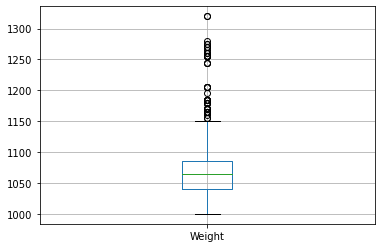

In [67]:
toyota1[['Weight']].boxplot()

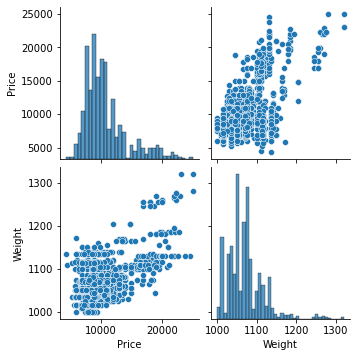

In [68]:
sns.pairplot(toyota1.loc[:,['Price','Weight']])

,Price,Weight,wt_sq,wt_sqrt,wt_log,wt_sq3,wt_sq4
Price,1.000000,0.586817,0.588970,0.585398,0.583772,0.590121,0.590173
Weight,0.586817,1.000000,0.999175,0.999804,0.999230,0.996595,0.992126
wt_sq,0.588970,0.999175,1.000000,0.998175,0.996814,0.999121,0.996390
wt_sqrt,0.585398,0.999804,0.998175,1.000000,0.999811,0.994770,0.989460
wt_log,0.583772,0.999230,0.996814,0.999811,1.000000,0.992602,0.986470
wt_sq3,0.590121,0.996595,0.999121,0.994770,0.992602,1.000000,0.999072
wt_sq4,0.590173,0.992126,0.996390,0.989460,0.986470,0.999072,1.000000


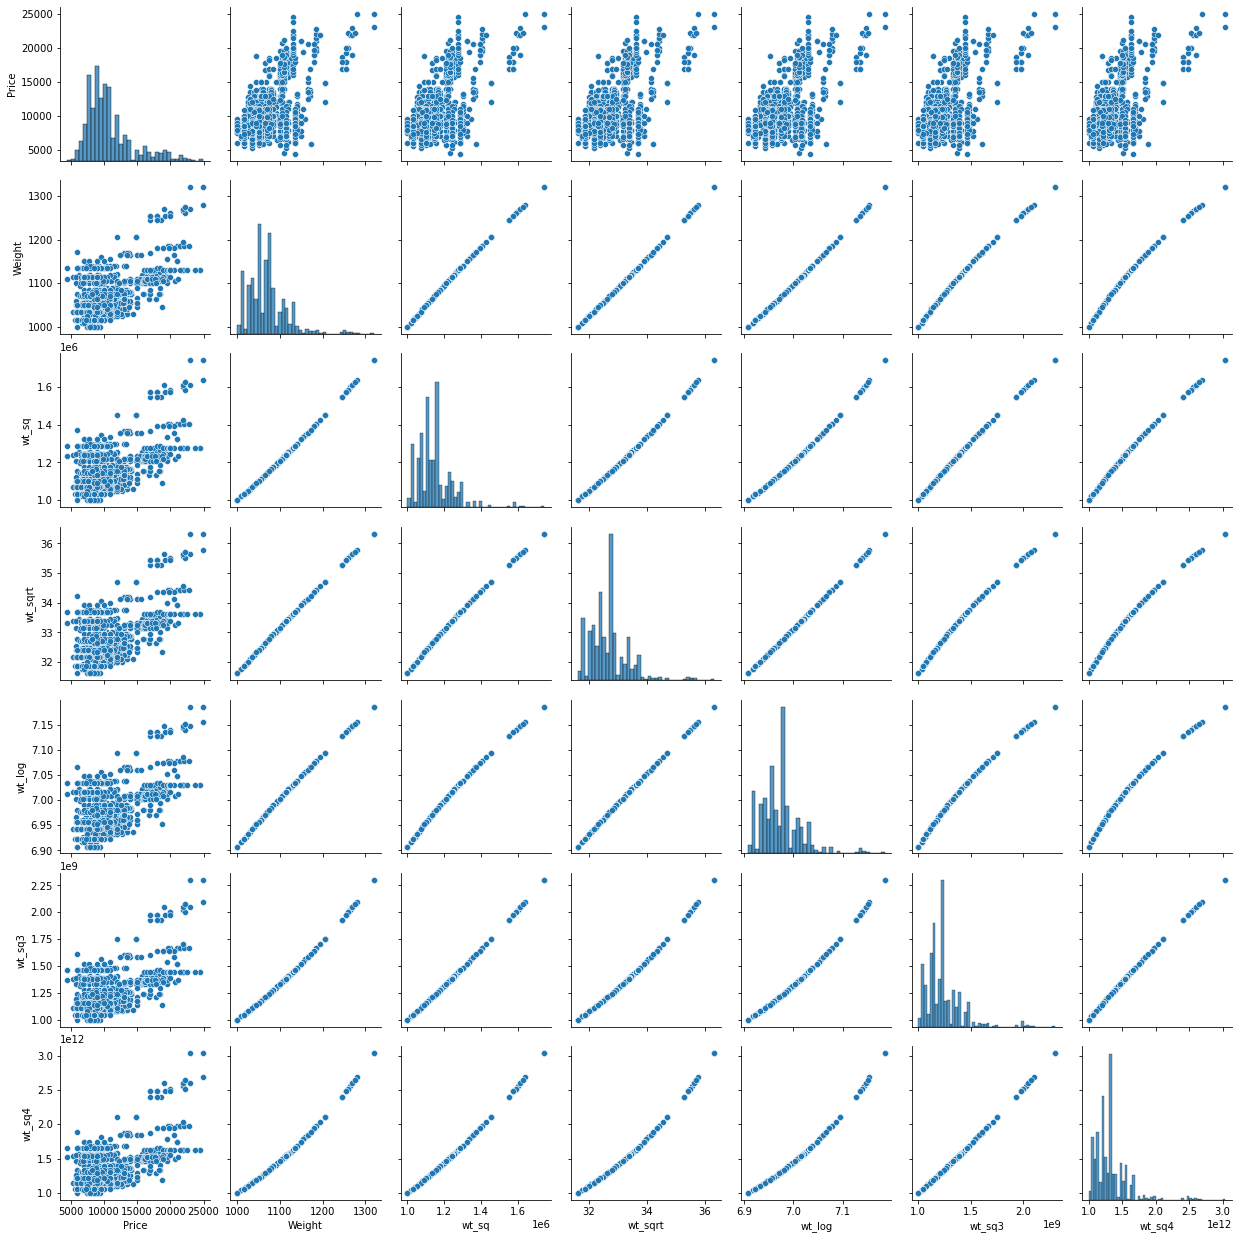

In [69]:
toyota1['wt_sq']=toyota1.Weight**2
toyota1['wt_sqrt']=toyota1.Weight**0.5
toyota1['wt_log']=np.log(toyota1.Weight)
toyota1['wt_sq3']=toyota1.Weight**3
toyota1['wt_sq4']=toyota1.Weight**4
sns.pairplot(toyota1.loc[:,['Price','Weight','wt_sq','wt_sqrt','wt_log','wt_sq3','wt_sq4']])
toyota1.loc[:,['Price','Weight','wt_sq','wt_sqrt','wt_log','wt_sq3','wt_sq4']].corr()

In [70]:
model5_sq=smf.ols('Price~age_sqrt+KM+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+wt_sq',data=toyota1).fit()
model5_sq3=smf.ols('Price~age_sqrt+KM+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+wt_sq3',data=toyota1).fit()
model5_sq4=smf.ols('Price~age_sqrt+KM+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+wt_sq4',data=toyota1).fit()

print(model4.rsquared,model5_sq.rsquared,model5_sq3.rsquared,model5_sq4.rsquared)

0.8867177036101024 0.8907075546012206 0.8908983485551372 0.890685041464101


In [71]:
print(np.sqrt(model3.mse_resid),np.sqrt(model4.mse_resid),np.sqrt(model5_sq.mse_resid),np.sqrt(model5_sq3.mse_resid),np.sqrt(model5_sq4.mse_resid))

1144.7555031243335 1162.2292541498575 1141.5786878114577 1140.5818144639757 1141.696258582532


# Cubing the weight variable givens the best rsquared and the best error

In [72]:
model5_sq3.params

Intercept        8217.682659
age_sqrt        -1508.749889
KM                 -0.017132
HP                 24.721318
cc                 -2.494176
Doors_3          2697.190016
Doors_4          2997.018266
Doors_5          2523.474378
Gears_5          3684.191583
Gears_6          4533.491077
Quarterly_Tax      -0.174582
wt_sq3              0.000008
dtype: float64

In [73]:
model5_sq3.pvalues

Intercept        1.972108e-134
age_sqrt         3.709887e-297
KM                3.825363e-48
HP                3.074079e-15
cc                4.715663e-16
Doors_3          1.339142e-126
Doors_4          4.834297e-114
Doors_5           3.057536e-82
Gears_5          1.367454e-112
Gears_6           8.111603e-97
Quarterly_Tax     8.975176e-01
wt_sq3            8.850950e-84
dtype: float64

In [74]:
model5_sq3.rsquared

0.8908983485551372

In [75]:
np.sqrt(model5_sq3.mse_resid)

1140.5818144639757

# requared value of 0.8990

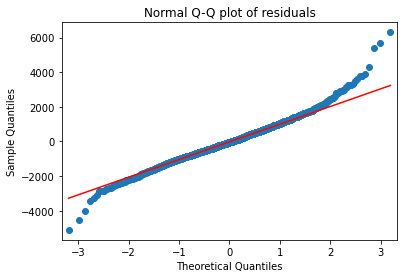

In [76]:
qqplot=sm.qqplot(model5_sq3.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

<AxesSubplot:>

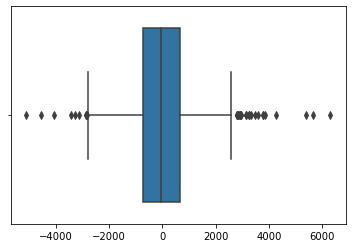

In [77]:
sns.boxplot(model5_sq3.resid)

<AxesSubplot:ylabel='Density'>

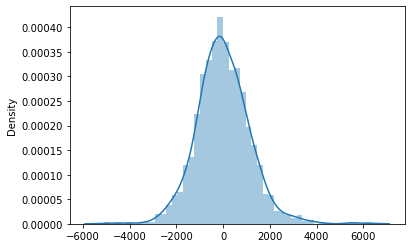

In [78]:
sns.distplot(model5_sq3.resid)

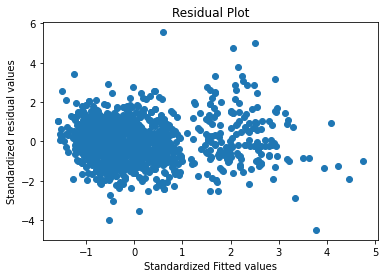

In [79]:
plt.scatter(get_standardized_values(model5_sq3.fittedvalues),
           get_standardized_values(model5_sq3.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# we are considering the model5_sq3 as the finalised model
model_finalised=model5_sq3

In [80]:
model_finalised=model5_sq3

# Predicting for new data

In [81]:
new=pd.DataFrame(columns=['Age_08_04','KM','HP','cc','Doors_3','Doors_4','Doors_5','Gears_5','Gears_6','Quarterly_Tax','Weight'])
#new.columns=['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']
new.loc[0]=[21,27543,100,1800,0,1,0,1,0,210,1200]
new.loc[1]=[36,57543,120,1900,0,1,0,1,0,240,1000]
new['age_sqrt']=new.Age_08_04**0.5
new['wt_sq3']=new.Weight**3
new

,Age_08_04,KM,HP,cc,Doors_3,Doors_4,Doors_5,Gears_5,Gears_6,Quarterly_Tax,Weight,age_sqrt,wt_sq3
0,21,27543,100,1800,0,1,0,1,0,210,1200,4.582576,1728000000
1,36,57543,120,1900,0,1,0,1,0,240,1000,6.000000,1000000000


In [82]:
model_finalised.predict(new)

0    19203.497638
1    11000.265634
dtype: float64